In [1]:
import sys
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Add the parent directory to sys.path to import project modules
# This allows importing from the project without running it
#sys.path.append(os.path.abspath('..'))

# Import your existing code
from knowledge_graph.data_processor import preprocess_data
from knowledge_graph.graph_builder import build_graph, visualize_graph
from knowledge_graph.schema import GraphSchema


In [2]:
# Define the path to your dataset
DATA_PATH = "D:\Code\BiomedicalAssistant\data\dataset.csv"  # Adjust path as needed

# Load and preprocess the data using your existing function
print("Processing data...")
diseases, symptoms, relationships = preprocess_data(DATA_PATH)

print(f"Found {len(diseases)} diseases and {len(symptoms)} symptoms")
print(f"Found {len(relationships)} disease-symptom relationships")

# Display sample of diseases and symptoms
print("\nSample diseases:")
for disease in list(diseases)[:5]:
    print(f"- {disease}")

print("\nSample symptoms:")
for symptom in list(symptoms)[:5]:
    print(f"- {symptom}")


Processing data...
Dataset columns: ['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']
Found 41 diseases and 131 symptoms
Found 36648 disease-symptom relationships

Sample diseases:
- Fungal infection
- Allergy
- GERD
- Chronic cholestasis
- Drug Reaction

Sample symptoms:
-  abdominal_pain
-  abnormal_menstruation
-  acidity
-  acute_liver_failure
-  altered_sensorium


In [3]:
# Build the graph using your existing function
print("Building graph...")
G = build_graph(diseases, symptoms, relationships)

# Print basic graph statistics
print(f"Graph built with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

# Count nodes by type
disease_nodes = [n for n, attr in G.nodes(data=True) if attr.get('label') == GraphSchema.DISEASE]
symptom_nodes = [n for n, attr in G.nodes(data=True) if attr.get('label') == GraphSchema.SYMPTOM]

print(f"Disease nodes: {len(disease_nodes)}")
print(f"Symptom nodes: {len(symptom_nodes)}")


Building graph...
Graph built with 172 nodes and 321 edges
Disease nodes: 41
Symptom nodes: 131


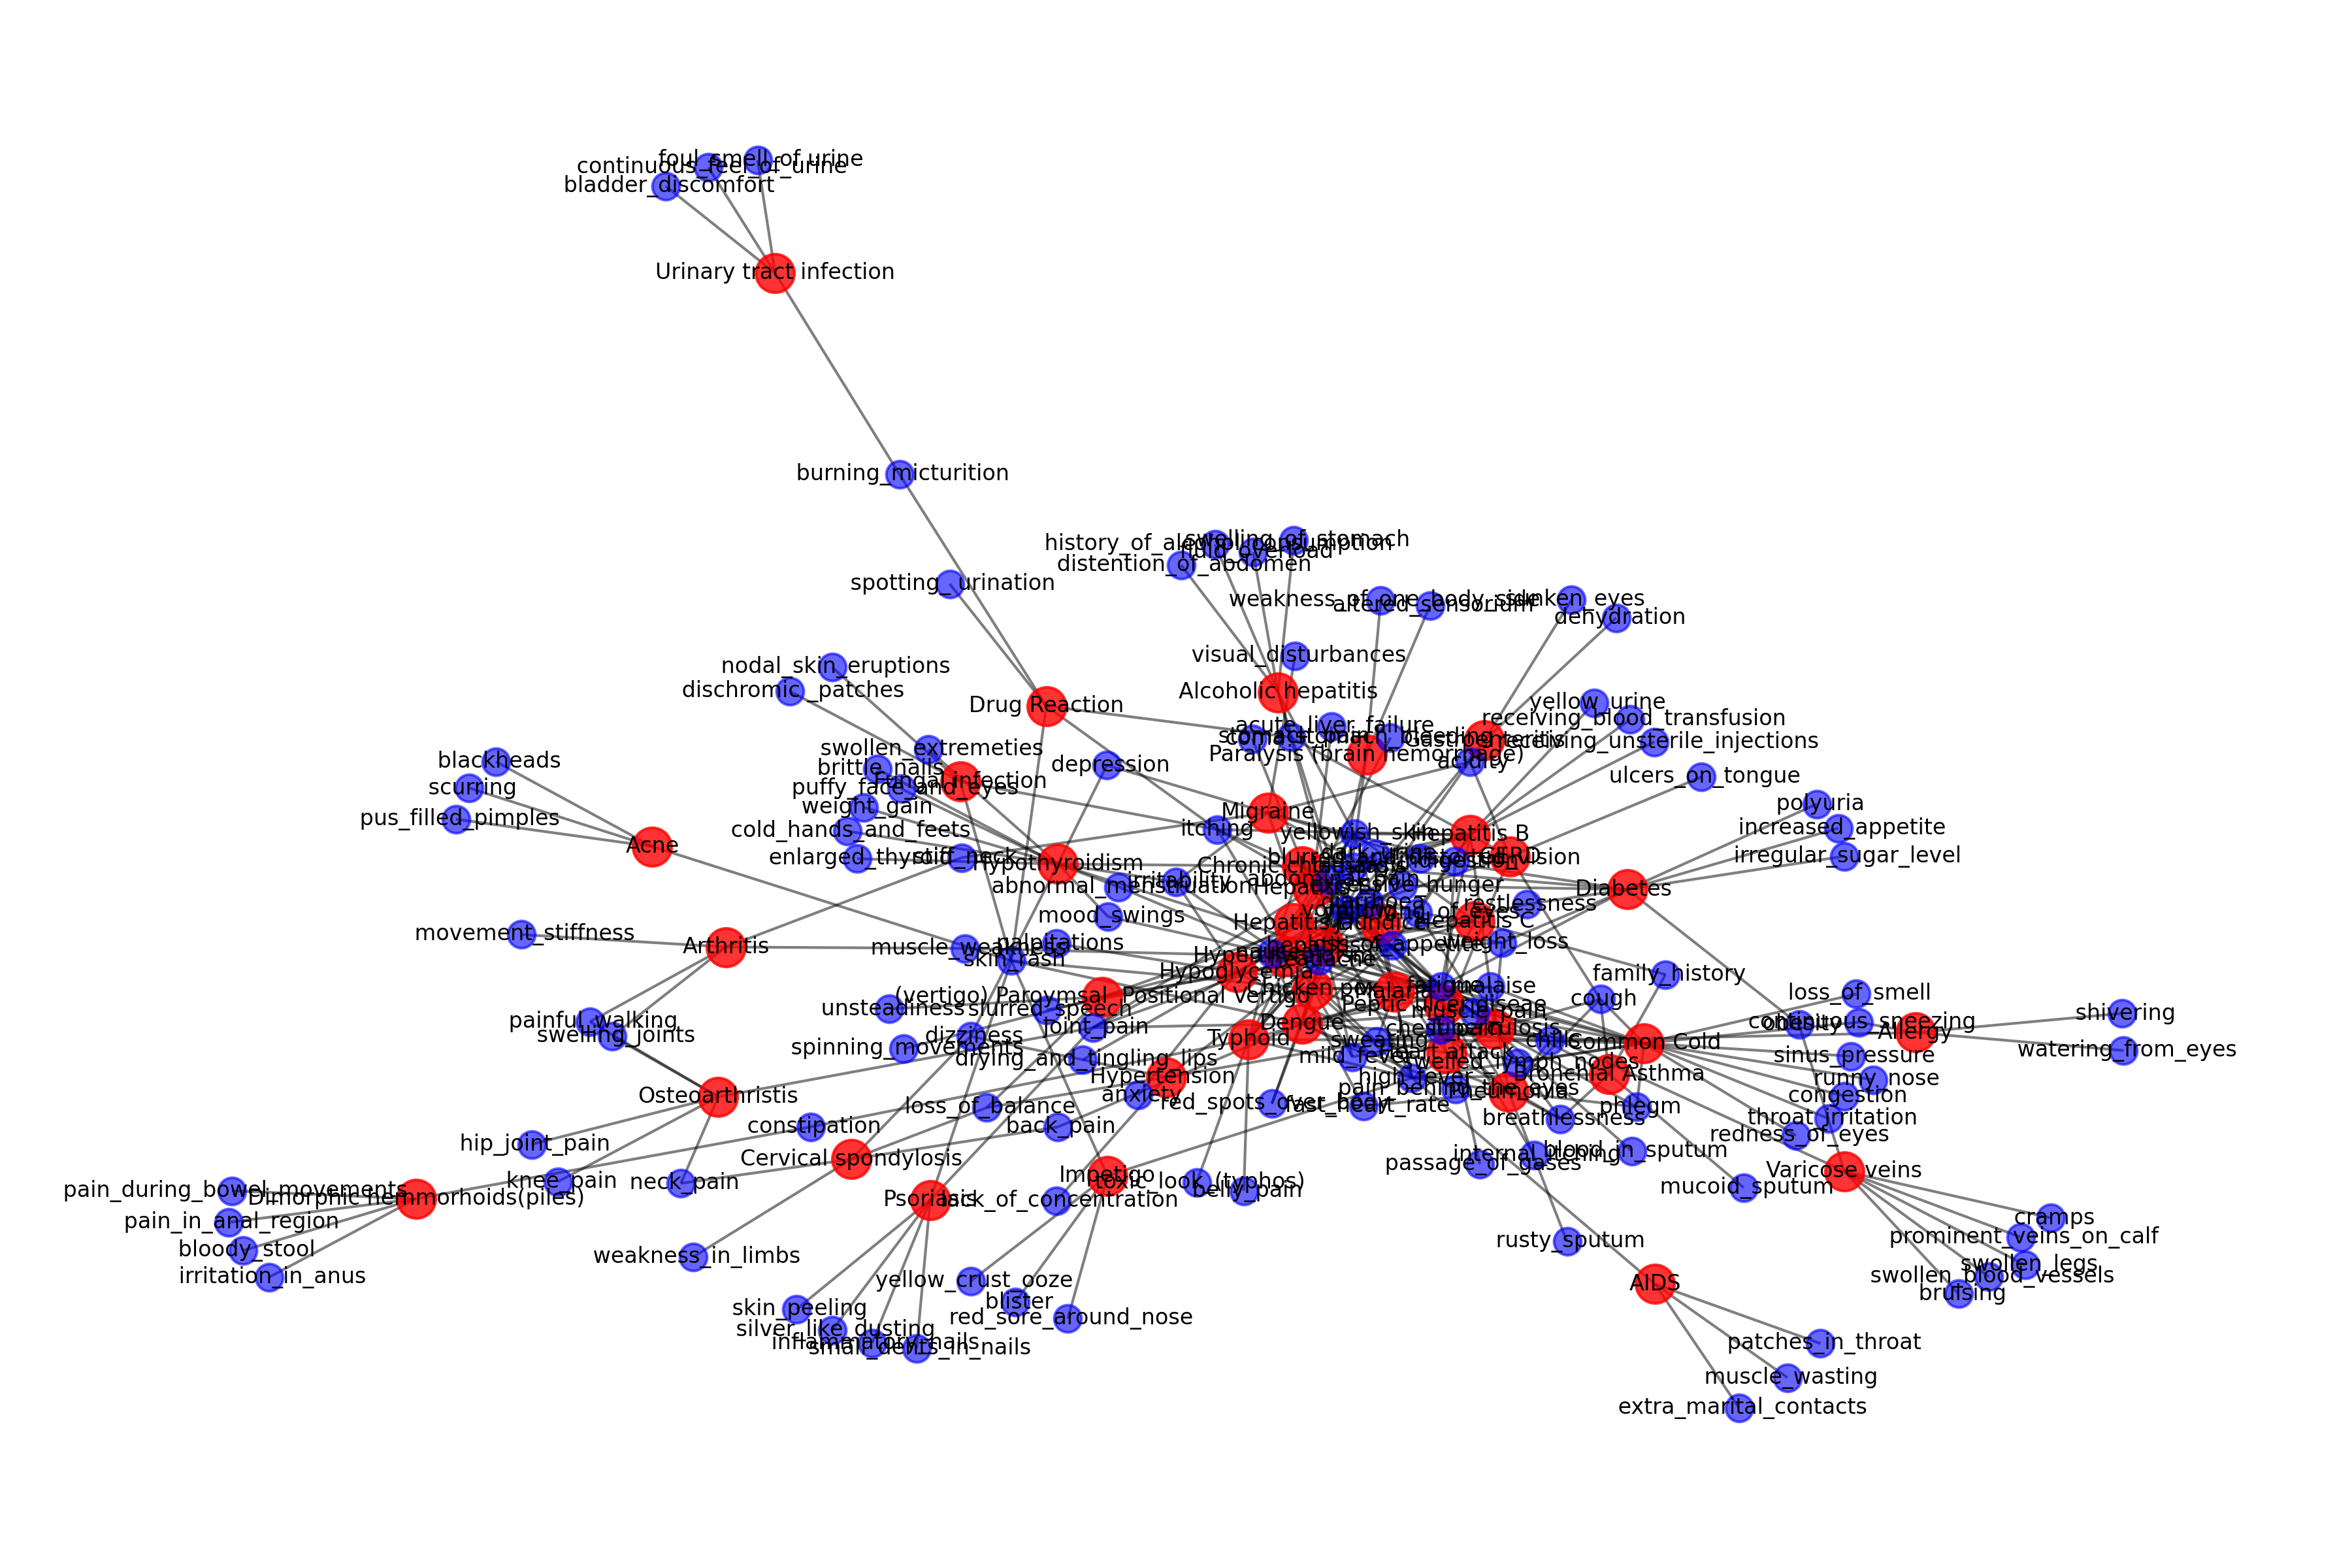

In [4]:
# Use the existing visualization function to create an image
visualize_graph(G, output_path='full_knowledge_graph.png')

# Display the image in the notebook
display(Image(filename='full_knowledge_graph.png'))


Disease 'Diabetes' not found in the graph


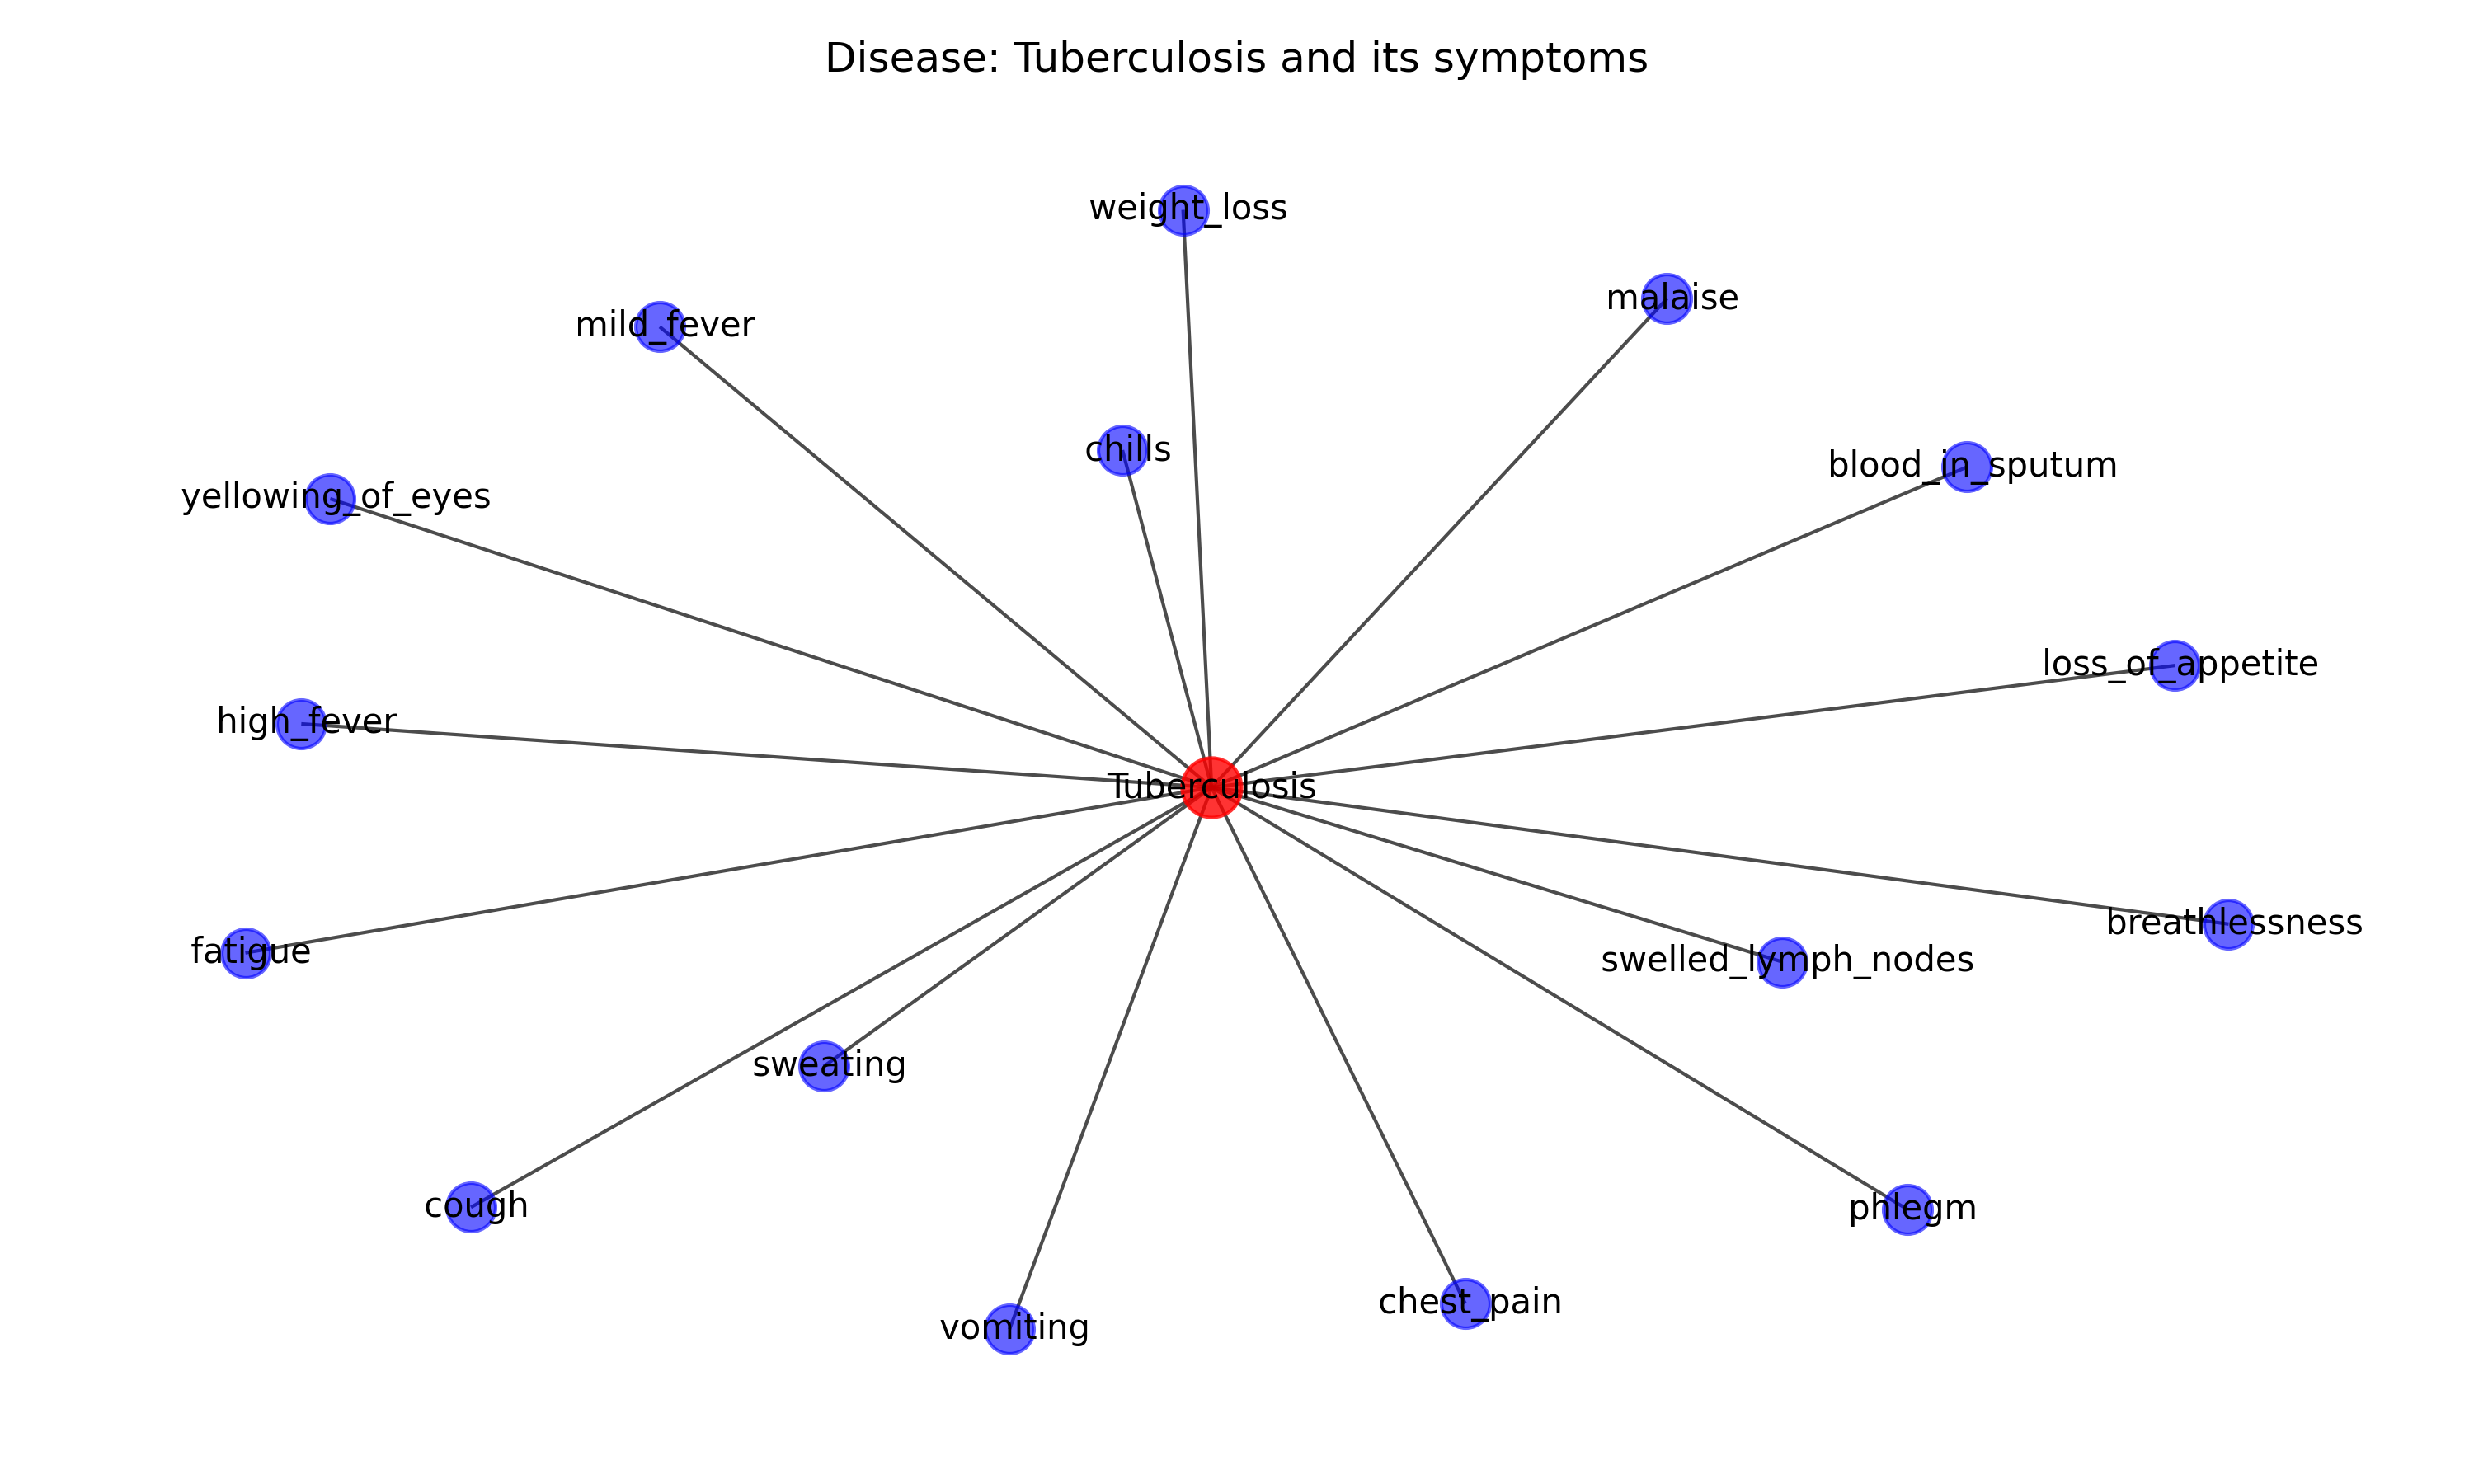

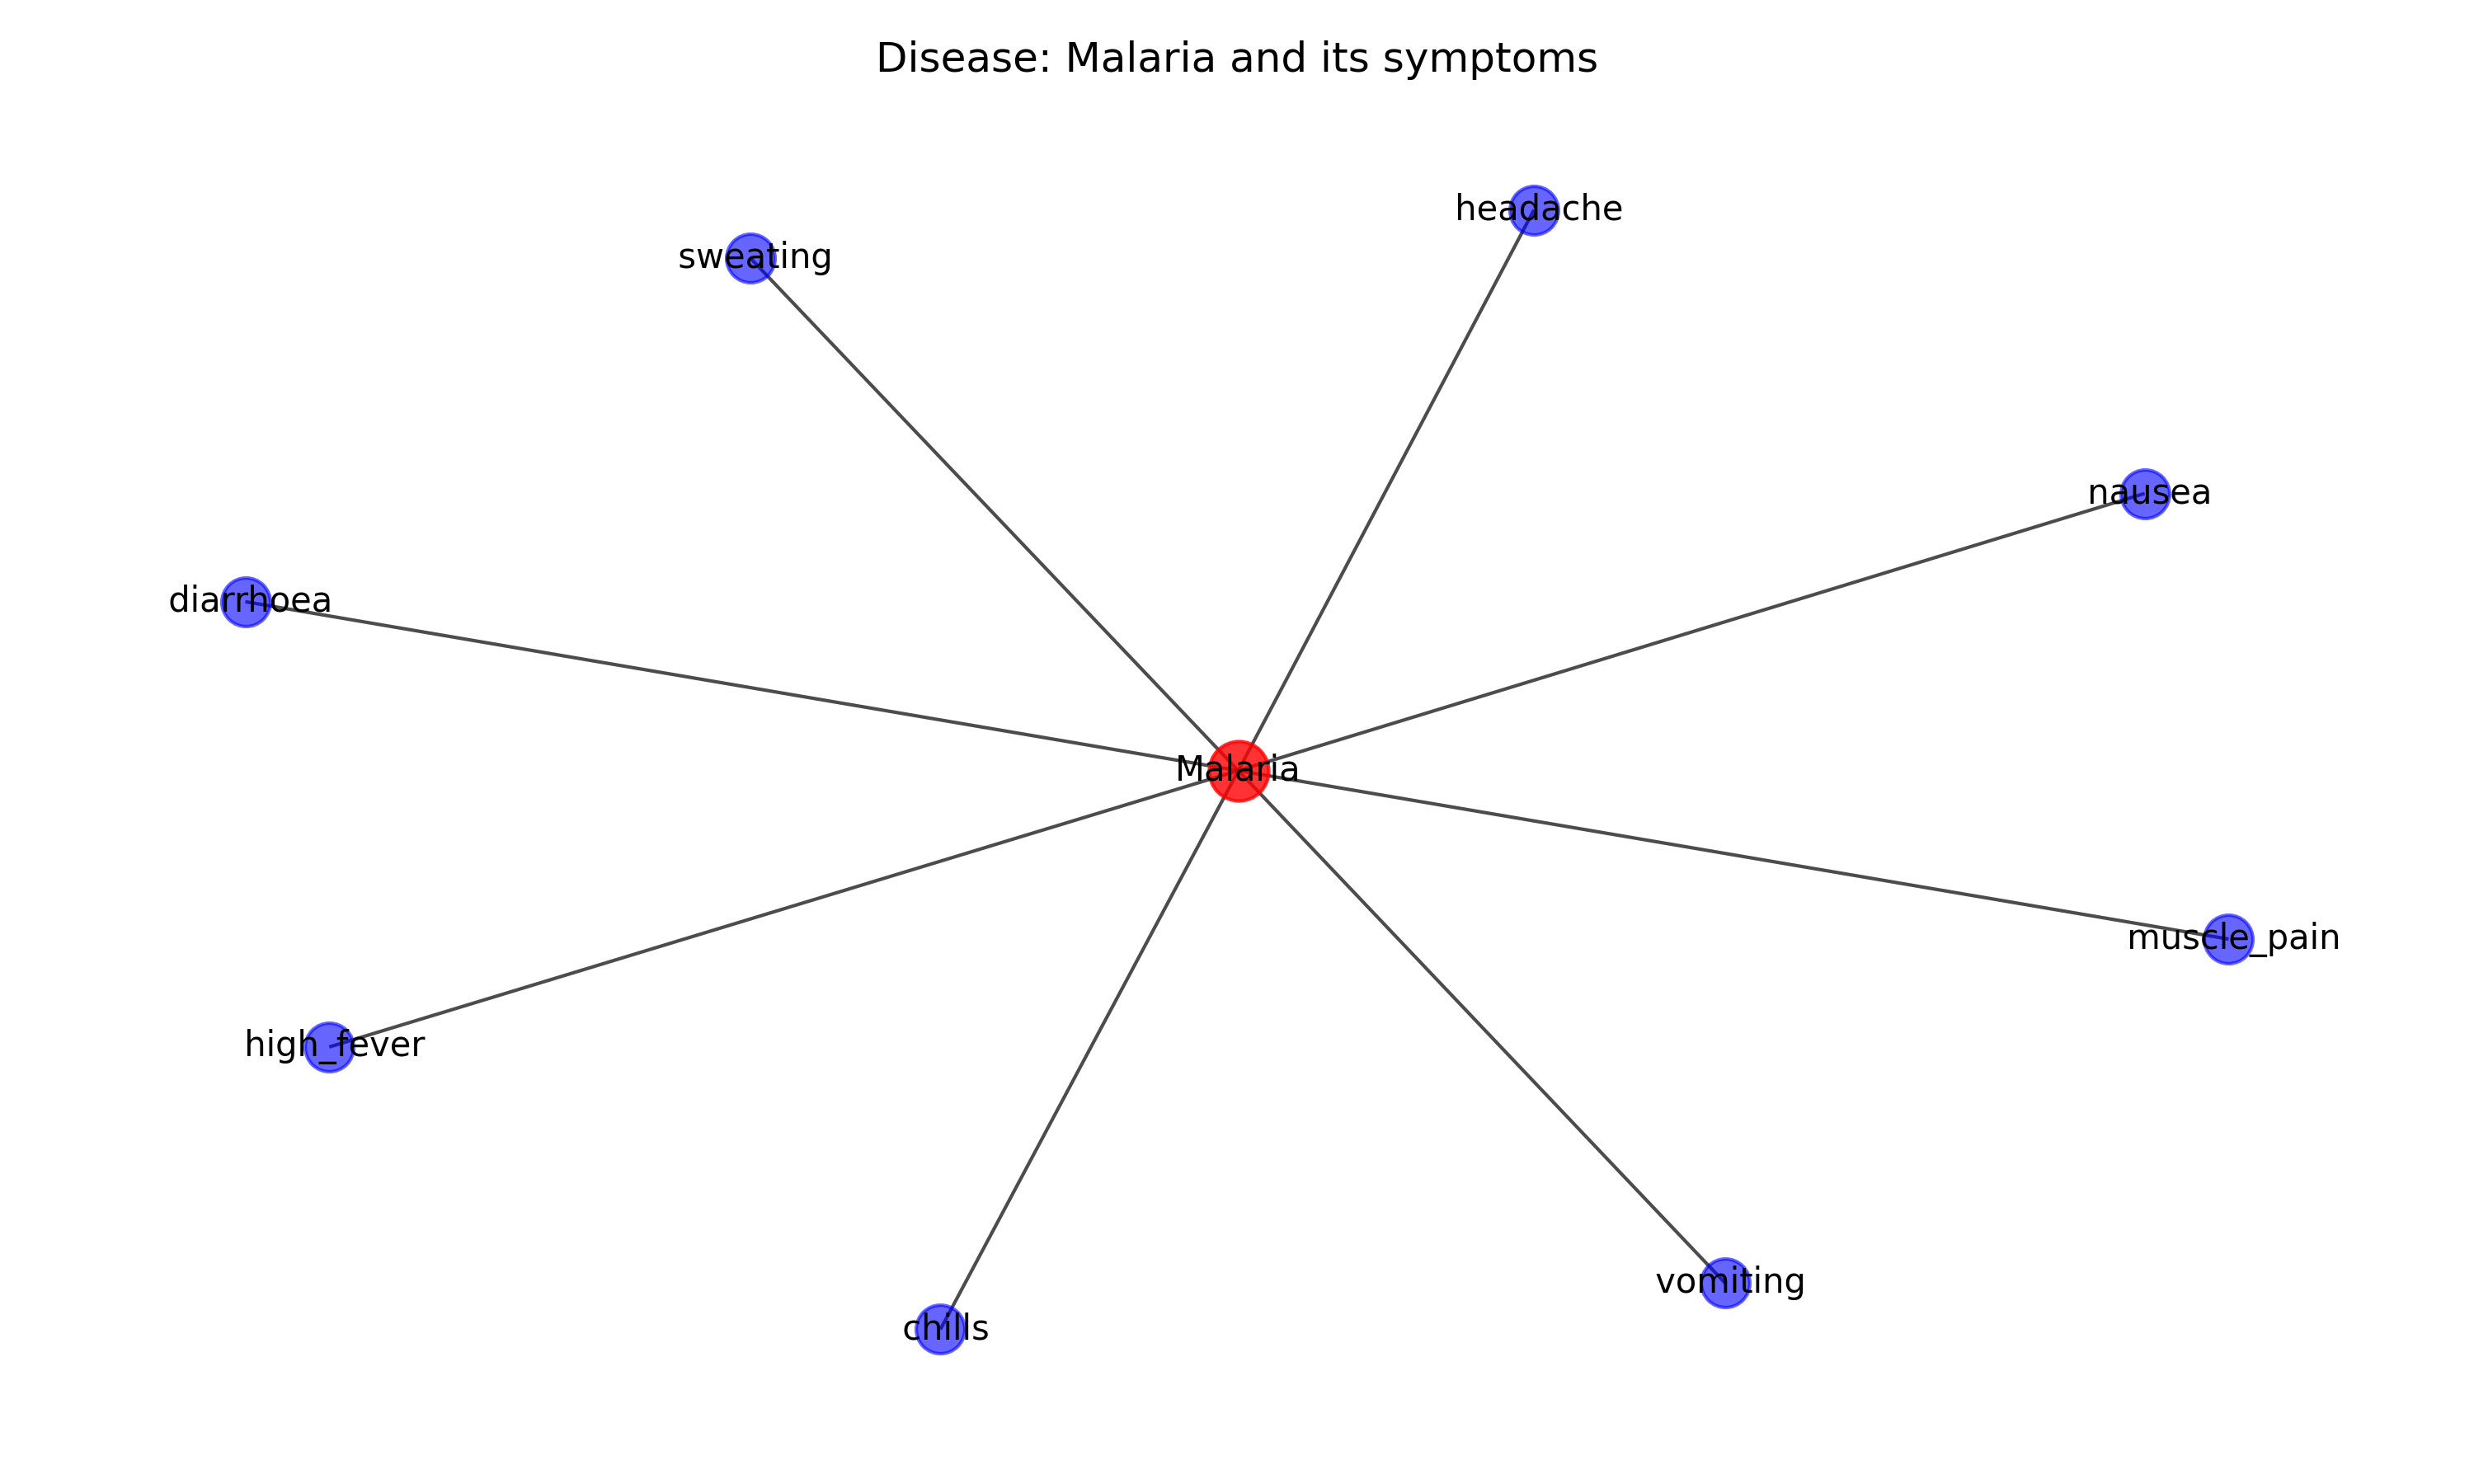

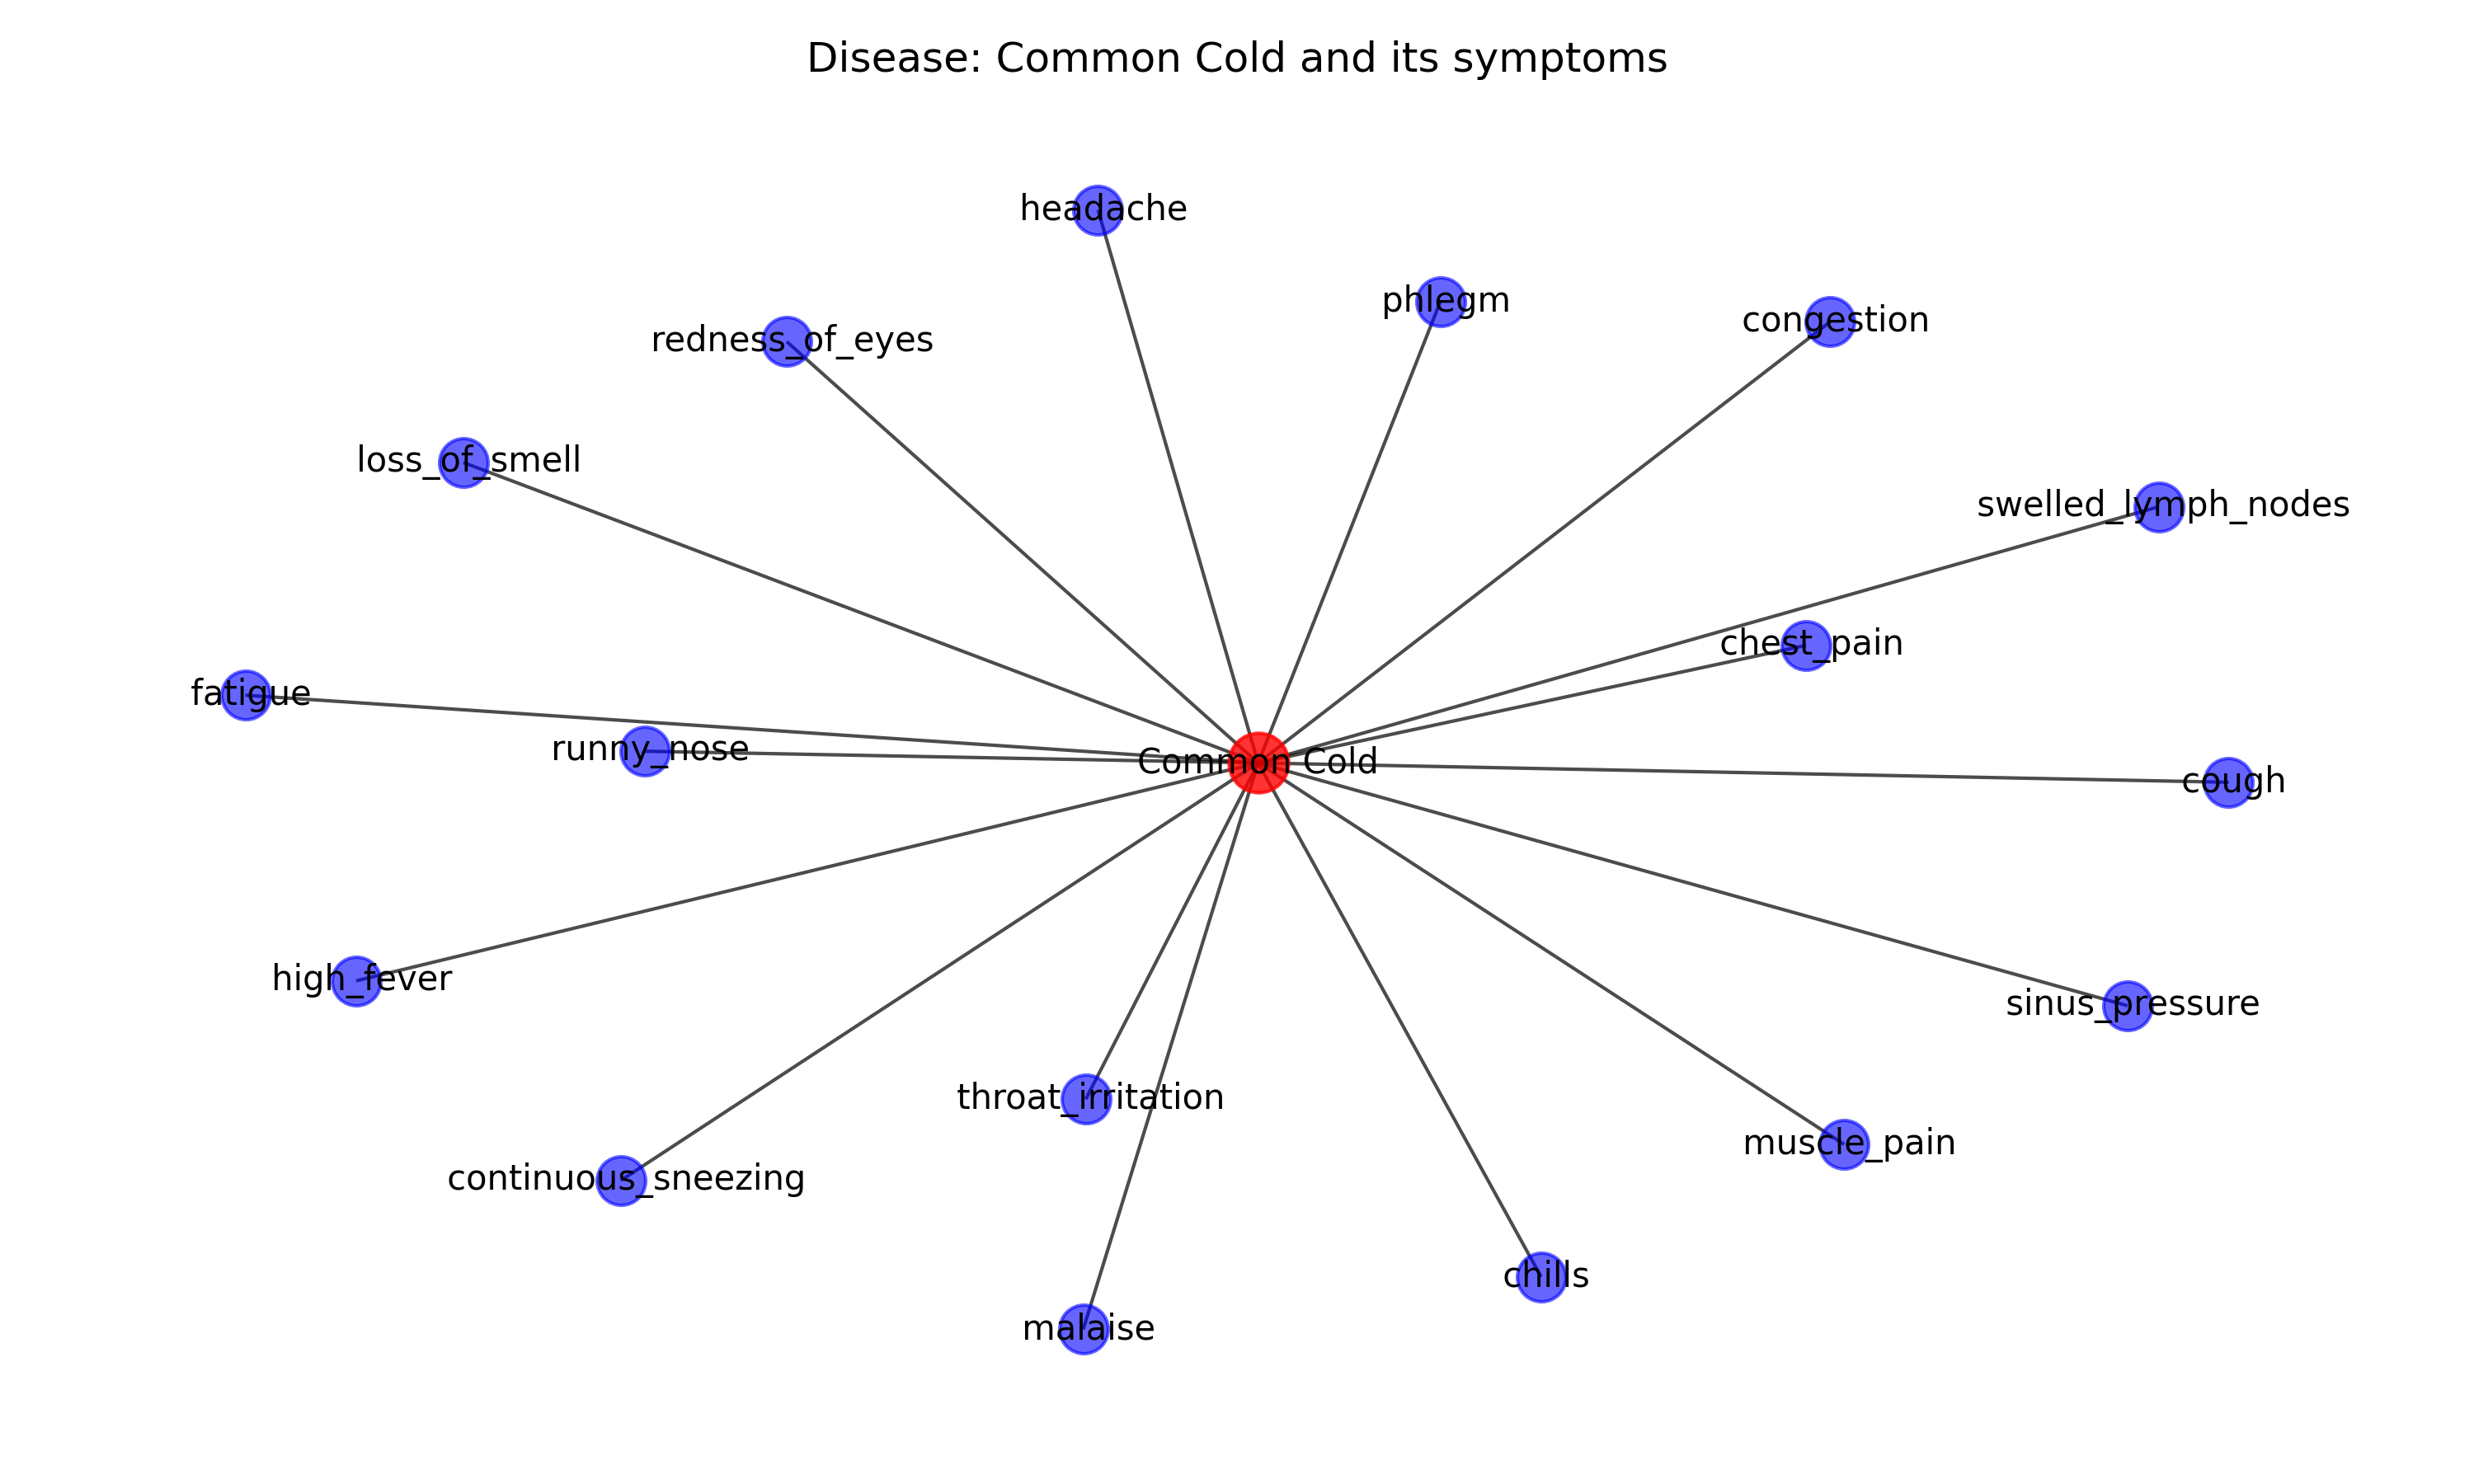

In [ ]:
def visualize_disease_subgraph(G, disease_name, output_path=None):
    """Visualize a subgraph for a specific disease and its symptoms."""
    if disease_name not in G.nodes():
        print(f"Disease '{disease_name}' not found in the graph")
        return
        
    # Get the disease node and its immediate neighbors (symptoms)
    neighbors = list(G.neighbors(disease_name))
    subgraph_nodes = [disease_name] + neighbors
    subgraph = G.subgraph(subgraph_nodes)
    
    plt.figure(figsize=(10, 6))
    
    # Get node positions
    pos = nx.spring_layout(subgraph, seed=42)  # Fixed seed for reproducibility
    
    # Draw disease node
    nx.draw_networkx_nodes(subgraph, pos, 
                          nodelist=[disease_name], 
                          node_color='red', 
                          node_size=300, 
                          alpha=0.8)
    
    # Draw symptom nodes
    symptom_nodes = [n for n in neighbors]
    nx.draw_networkx_nodes(subgraph, pos, 
                          nodelist=symptom_nodes, 
                          node_color='blue', 
                          node_size=200, 
                          alpha=0.6)
    
    # Draw edges
    nx.draw_networkx_edges(subgraph, pos, width=1.0, alpha=0.7)
    
    # Draw labels
    nx.draw_networkx_labels(subgraph, pos, font_size=10)
    
    plt.title(f"Disease: {disease_name} and its symptoms")
    plt.axis('off')
    plt.tight_layout()
    
    if output_path:
        plt.savefig(output_path, dpi=300)
        plt.close()
        display(Image(filename=output_path))
    else:
        plt.show()

# Visualize subgraphs for a few example diseases
example_diseases = ["Diabetes", "Tuberculosis", "Malaria", "Common Cold"]

for disease in example_diseases:
    output_path = f"{disease.replace(' ', '_')}_subgraph.png"
    visualize_disease_subgraph(G, disease, output_path)


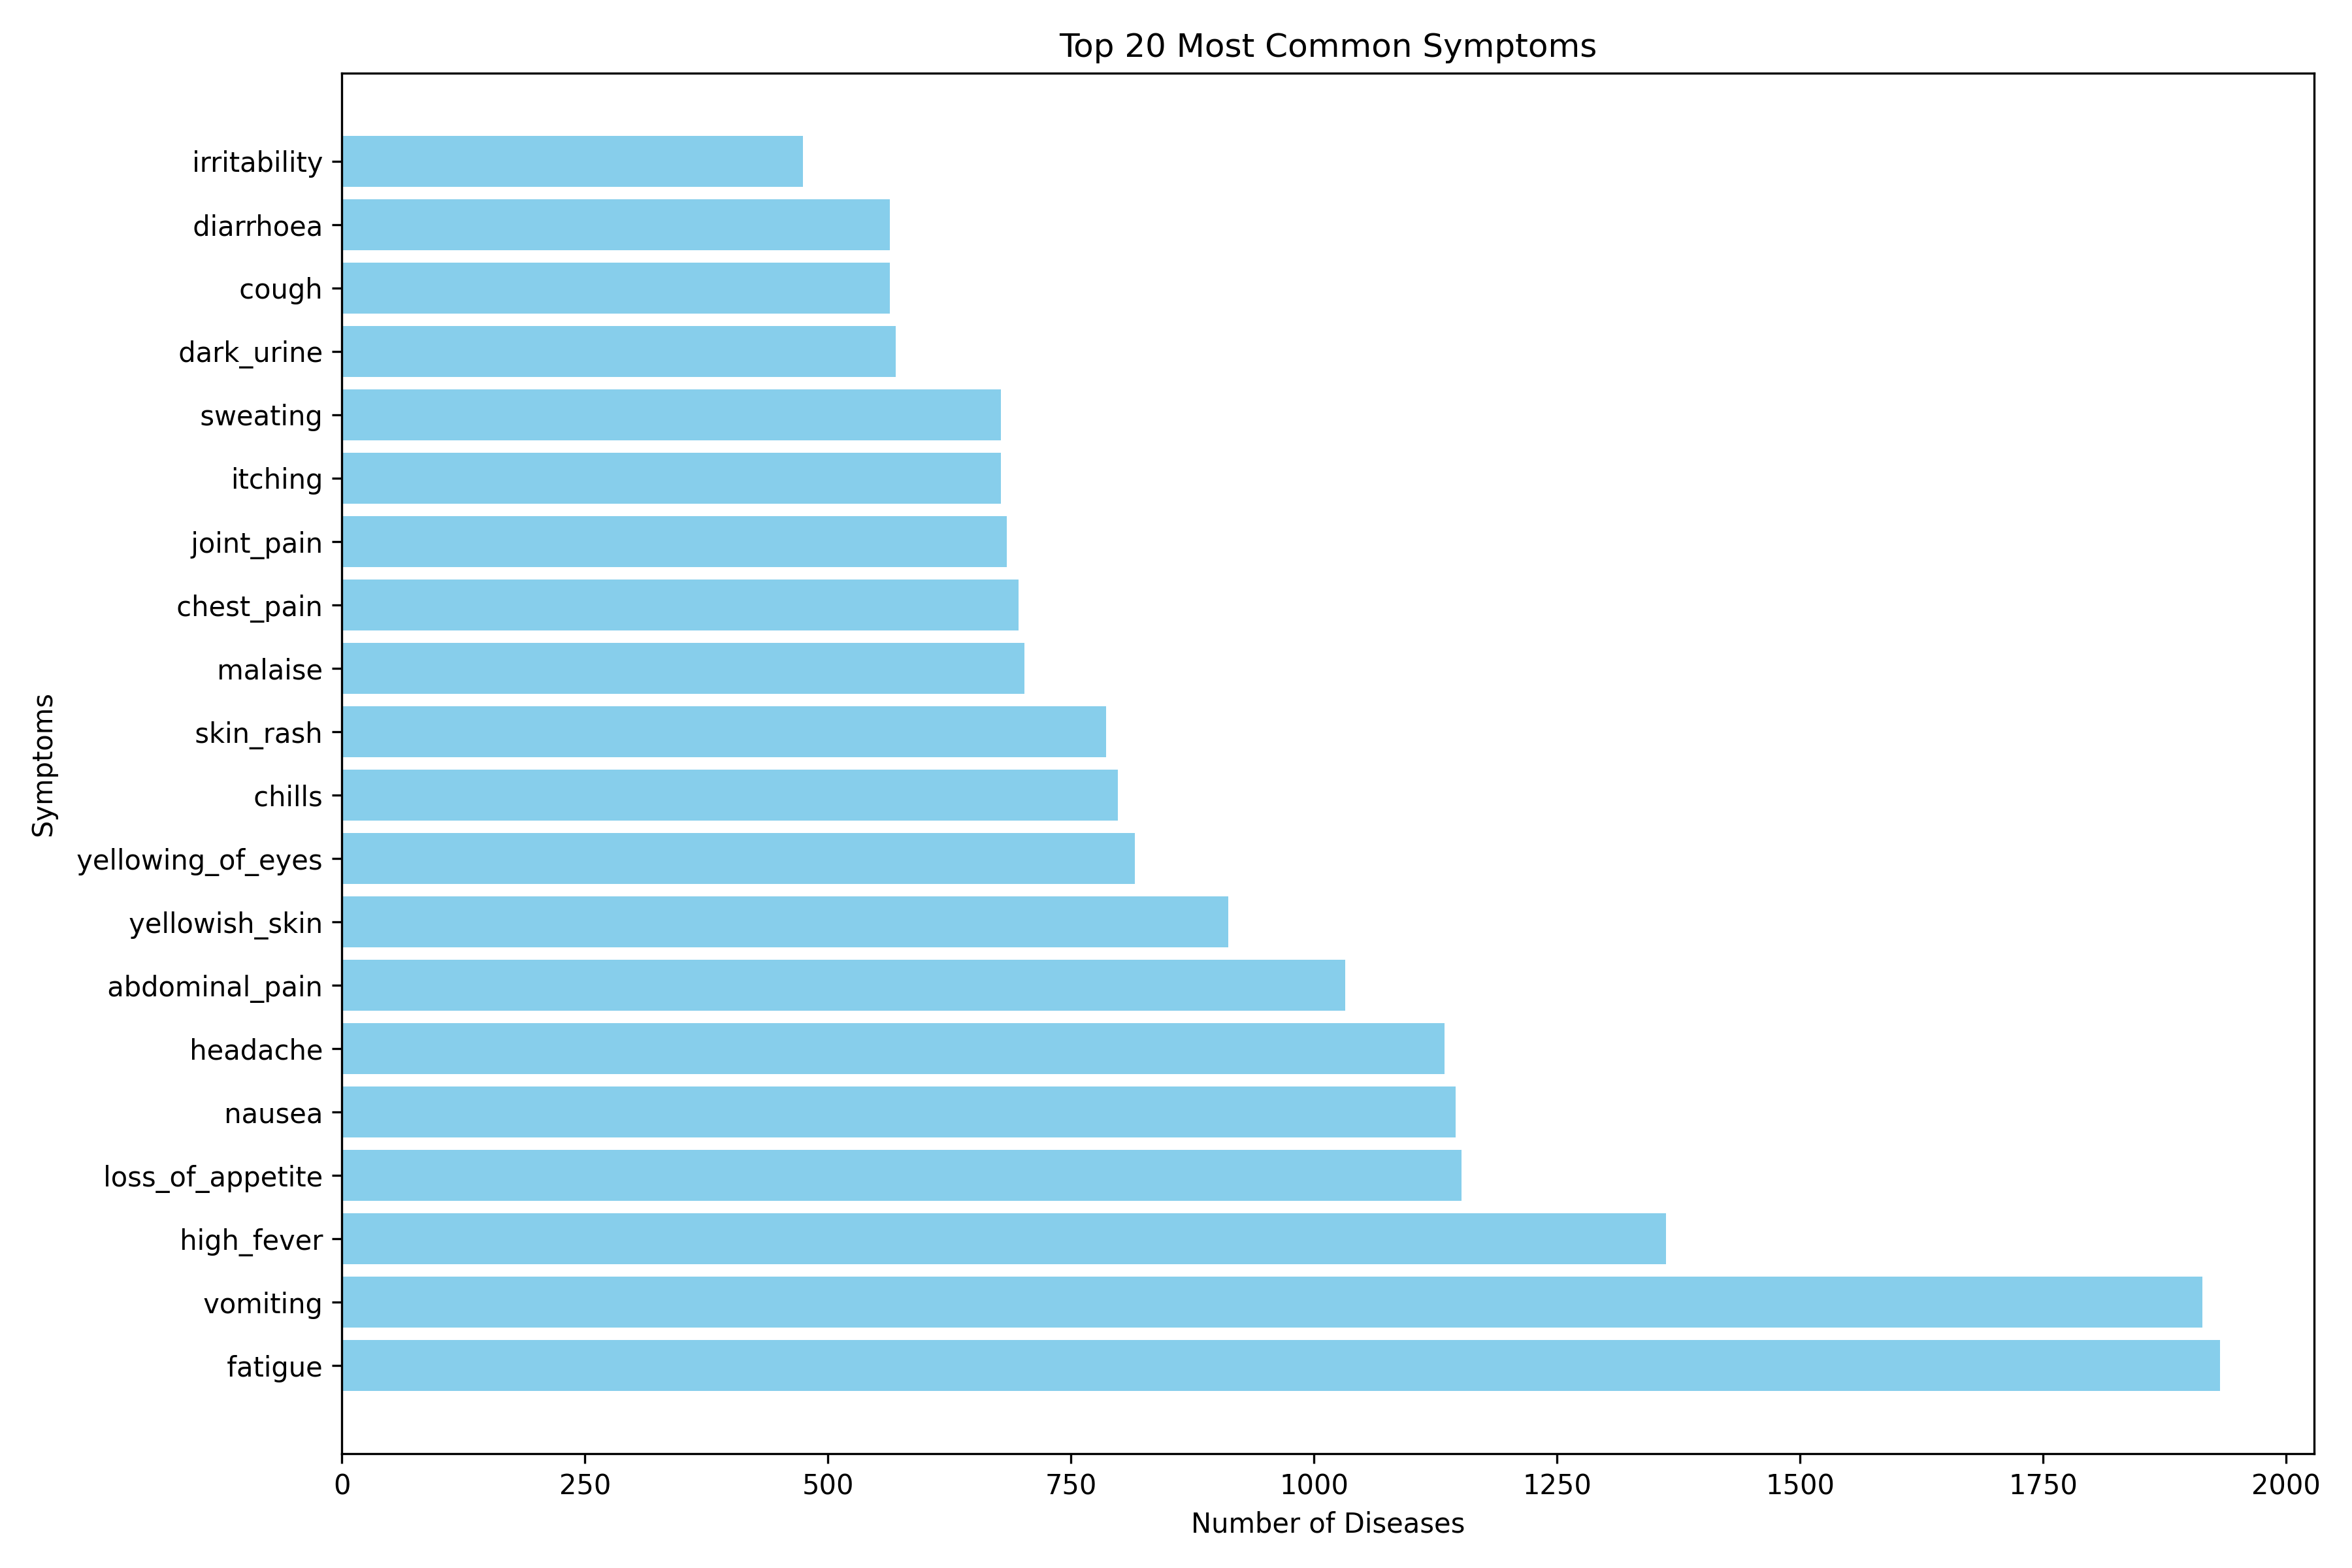

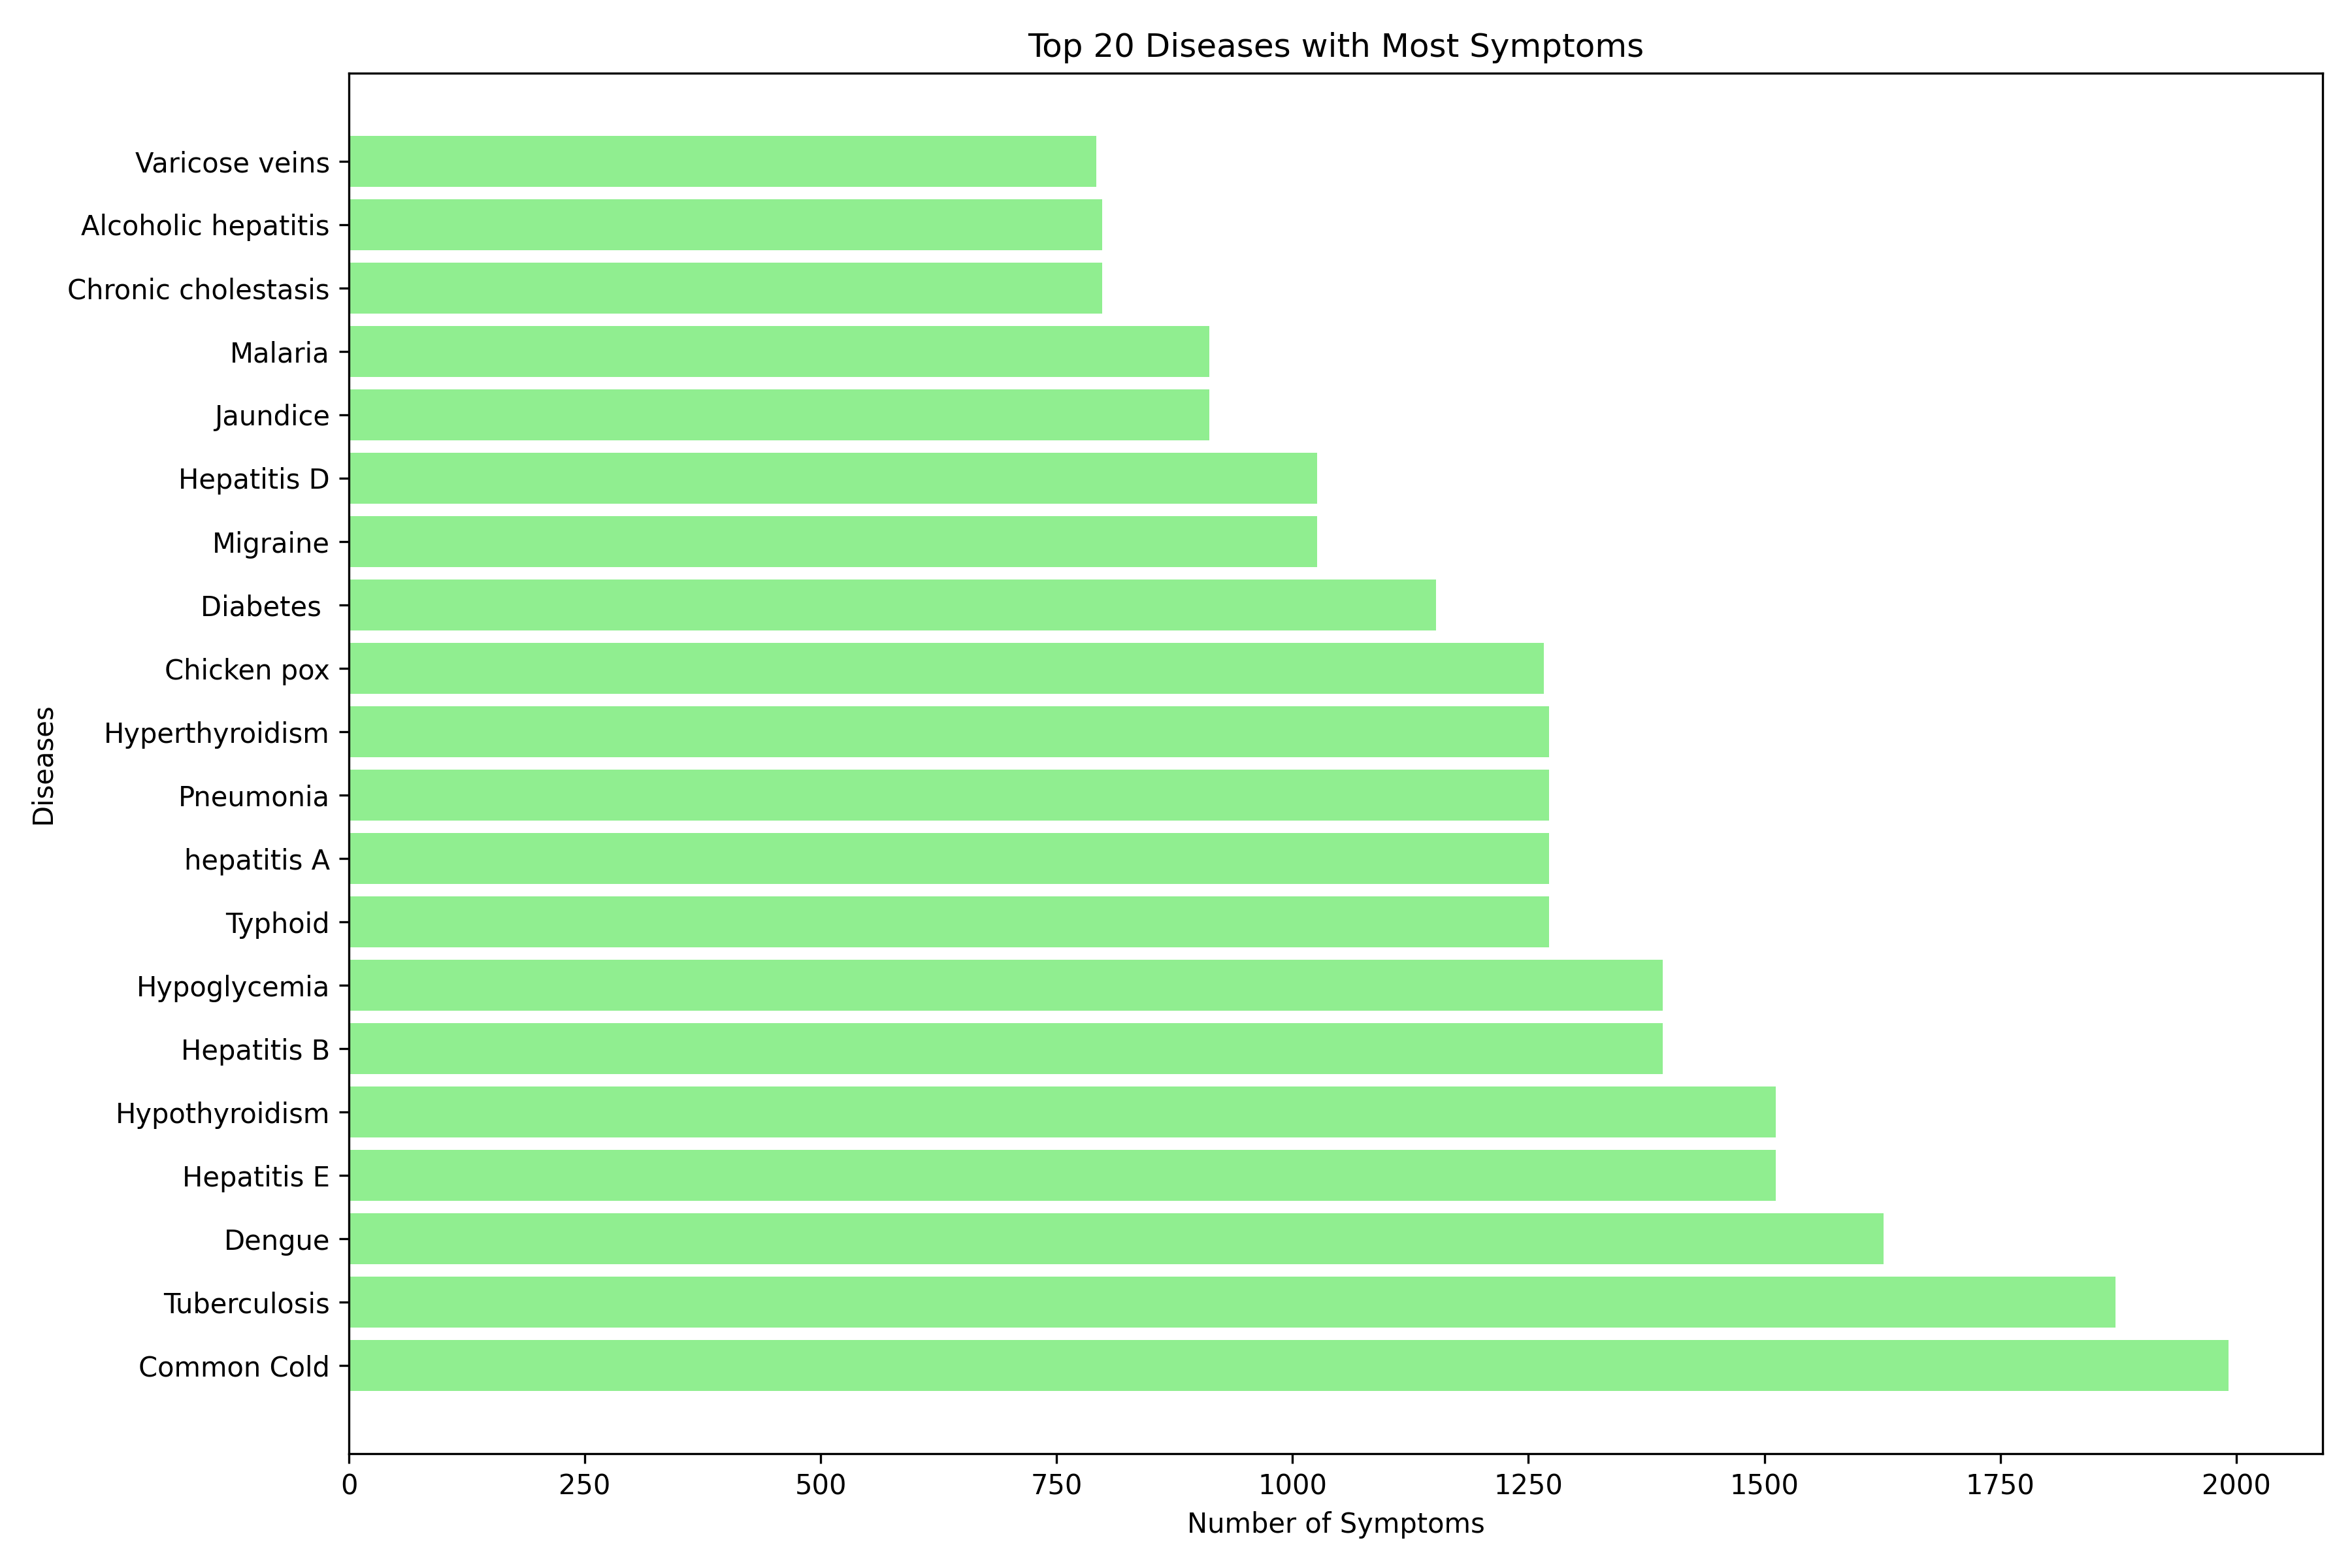

In [6]:
# Analyze symptom distribution
symptom_count = {}
for rel in relationships:
    symptom = rel['target']
    if symptom in symptom_count:
        symptom_count[symptom] += 1
    else:
        symptom_count[symptom] = 1

# Sort symptoms by frequency
sorted_symptoms = sorted(symptom_count.items(), key=lambda x: x[1], reverse=True)

# Plot the top 20 most common symptoms
plt.figure(figsize=(12, 8))
top_symptoms = sorted_symptoms[:20]
symptoms = [s[0] for s in top_symptoms]
counts = [s[1] for s in top_symptoms]

plt.barh(symptoms, counts, color='skyblue')
plt.xlabel('Number of Diseases')
plt.ylabel('Symptoms')
plt.title('Top 20 Most Common Symptoms')
plt.tight_layout()
plt.savefig('top_symptoms.png', dpi=300)
plt.close()
display(Image(filename='top_symptoms.png'))

# Analyze disease complexity (number of symptoms per disease)
disease_complexity = {}
for rel in relationships:
    disease = rel['source']
    if disease in disease_complexity:
        disease_complexity[disease] += 1
    else:
        disease_complexity[disease] = 1

# Sort diseases by number of symptoms
sorted_diseases = sorted(disease_complexity.items(), key=lambda x: x[1], reverse=True)

# Plot the top 20 diseases with the most symptoms
plt.figure(figsize=(12, 8))
top_diseases = sorted_diseases[:20]
disease_names = [d[0] for d in top_diseases]
symptom_counts = [d[1] for d in top_diseases]

plt.barh(disease_names, symptom_counts, color='lightgreen')
plt.xlabel('Number of Symptoms')
plt.ylabel('Diseases')
plt.title('Top 20 Diseases with Most Symptoms')
plt.tight_layout()
plt.savefig('disease_complexity.png', dpi=300)
plt.close()
display(Image(filename='disease_complexity.png'))
